In [1]:
import numpy as np
import soundfile as sf
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Audio
from librosa.feature import melspectrogram
from librosa.display import specshow
import librosa
import scipy

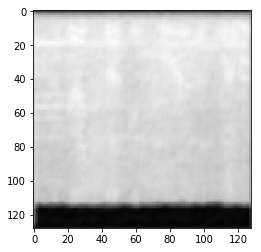

In [406]:
spec = scipy.misc.imread('../out_test/sp25.png')[:,:,0]
plt.imshow(spec, cmap='gray')

In [407]:
def draw(audio, sr):
    audio=audio[:16384]
    freqs, bins, Sxx = scipy.signal.stft(audio, nfft=256, fs=sr, noverlap=128)
    angle = np.angle(Sxx)
    Sxx = np.abs(Sxx)
    print(Sxx.shape)
    plt.imshow(np.log10(Sxx[:,:-1]), cmap='gray')
    return Sxx, angle

(129, 129)


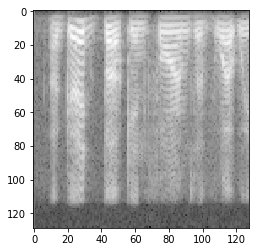

In [408]:
audio, sr = sf.read('../data/audio/clean/sp25.wav')
Sxx, angle = draw(audio, sr)

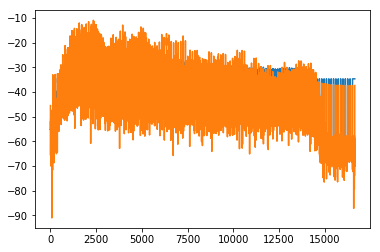

In [409]:
# s = spec / -2.83
s = spec.copy()
s = np.vstack((s, np.full(128, spec.mean())))
s = np.hstack((s, np.full((129,1), spec.mean())))
s = (s/6 - 67)

p = 10*np.log10(Sxx)

plt.plot(s.flatten())
plt.plot(p.flatten())

# plt.plot((p-s).flatten())

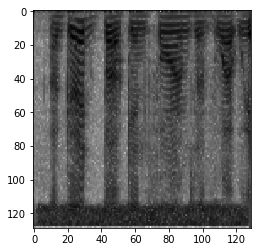

In [410]:
plt.imshow(s-p,cmap='gray')

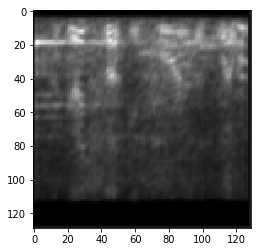

In [411]:
plt.imshow(np.power(10, s/10), cmap='gray')

(129, 129)


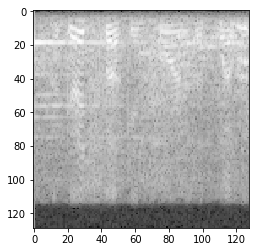

In [418]:
audio, sr = sf.read('../data/audio/airport0dB/sp25_airport_sn0.wav')
qq, angle = draw(audio, sr)
Audio(audio, rate=sr)

In [419]:
t, x = scipy.signal.istft(np.power(10, s/10) * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

In [414]:
t, x = scipy.signal.istft(Sxx * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)